In [ ]:

import numpy as np
import random
import gym
from gym.wrappers import Monitor
import glob
import io
import matplotlib.pyplot as plt
from IPython.display import HTML
import pandas as pd
from IPython import display
from IPython.display import clear_output
from tqdm import tqdm
import time
from IPython.display import display, clear_output
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches

In [ ]:

#Setting up the environment
env = gym.make('Taxi-v3')

env.reset()

#Current State
print(env.s)

print ("Number of states:", env.nS)

# Primitive Actions
action = ["south", "north", "east", "west","pick","drop"]
#correspond to [0,1,2,3] that's actually passed to the environment

# R, G, Y, B, 0 , 1, 2, 3 in state decoding
# either go left, up, down or right, pickup or dropoff
print ("Number of actions that an agent can take:", env.nA)

# Example Transitions
rnd_action = random.randint(0, 5)
print ("Action taken:", action[rnd_action])
next_state, reward, is_terminal, t_prob = env.step(rnd_action)
print ("Transition probability:", t_prob)
print ("Next state:", next_state)
print ("Reward recieved:", reward)
print ("Terminal state:", is_terminal)
env.render()

269
Number of states: 500
Number of actions that an agent can take: 6
Action taken: west
Transition probability: {'prob': 1.0}
Next state: 249
Reward recieved: -1
Terminal state: False
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [ ]:
env.reset()
env.step(0)

env.reset()
# print(list(env.decode(env.s))[:2])
print(list(env.decode(env.s)))
env.render()
R = [0,0]
G = [0,4]
Y = [4,0]
B = [4,3]

[0, 4, 2, 1]
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



We consider the goal state to be either of the four R,G,Y,B. We need a data structure to hold these 4 Q-tables. 


In [ ]:

seed = 42
rg = np.random.RandomState(seed)


In [ ]:
def plot_Q(Q, message = "Q plot"):
    
    # plt.figure(figsize=(10,10))
    fig, ax = plt.subplots(figsize = (10,10))

    Q_max = Q.max(-1)
    
    im = ax.imshow(Q_max)
    

    
    cbar = ax.figure.colorbar(im, ax=ax)
    
    ax.set_title(message)
    #ax.grid(visible = True, which="major", color="w", linestyle='-', linewidth=2)
    ax.set_xlim([0, 5])
    ax.set_ylim([0,5])
    ax.pcolor(Q_max, edgecolors='k', linewidths=1)
    #plt.colorbar()
    
    # plt.colorbar()
    def x_direct(a):
        if a in [0, 1]:
            return 0
        return 1 if a == 2 else -1
    def y_direct(a):
        if a in [2, 3]:
            return 0
        return 1 if a == 1 else -1
    policy = Q.argmax(-1)
    policyx = np.vectorize(x_direct)(policy)
    policyy = np.vectorize(y_direct)(policy)
    idx = np.indices(policy.shape)
    ax.quiver(idx[1].ravel()+ 0.5, idx[0].ravel()+0.5, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')
    fig.tight_layout()

def q_learning(env,goal_state, episodes = 1000, alpha0 = 0.4,  epsilon0 = 0.2, beta = 1, gamma = 0.9, plot_heat = True, print_freq = 100, max_steps = 200):


    Q = np.zeros((5,5, 4))  #only first 4 actions allowed

    episode_rewards = np.zeros(episodes)
    steps_to_completion = np.zeros(episodes)
    '''if plot_heat:
        clear_output(wait=True)
        plot_Q(Q)'''
    epsilon = epsilon0
    alpha = alpha0
    for ep in tqdm(range(episodes)):
        tot_reward, steps = 0, 0
        
        # Reset environment
        state_seq = env.reset()
        state = list(env.decode(state_seq))[:2]

        done = False
        while not done:
            action = egreedy_policy(Q,state,epsilon)

            state_next_seq, reward ,_,_ = env.step(action)

            #action_next = np.argmax(Q[state_next])
            state_next = list(env.decode(state_next_seq))[:2]

            if(state_next == state):
              reward += -20

            if(state_next == goal_state):
              reward += 100
            
            
            # update equation
            Q[state[0],state[1], action] += alpha*(reward + gamma*np.max(Q[state_next[0],state_next[1]]) - Q[state[0],state[1], action])
                                                    
            tot_reward += reward
            steps += 1

            #How do we know the state index of R,G,Y,B?
            if steps == max_steps or state_next == goal_state : done =True
            
            state = state_next
            
        
        episode_rewards[ep] = tot_reward
        steps_to_completion[ep] = steps

        
        #if (ep+1)%print_freq == 0 and plot_heat:
    clear_output(wait=True)
    plot_Q(Q, message = "Episode %d: Reward: %f, Steps: %.2f, Qmax: %.2f, Qmin: %.2f"%(ep+1, np.mean(episode_rewards[ep-print_freq+1:ep]),
                                                                           np.mean(steps_to_completion[ep-print_freq+1:ep]),
                                                                           Q.max(), Q.min()))
    #display.display( df.T )  
    return Q, episode_rewards, steps_to_completion, env

In [ ]:
#0-"south"
#1- "north"
#2- "east"
#3- "west"

In [ ]:
from IPython.display import Image
# alpha = 0.4
alpha=  0.19751633358692788
epsilon = 0.12233772892858322
gamma = 0.9684975038393936

R_mat = np.array([[1,3,0,0,0],
                  [1,1,0,0,0],
                  [1,1,3,3,3],
                  [1,1,1,1,1],
                  [1,1,1,1,1]])
#Image('/content/option_R.png')

In [ ]:

Y_mat = np.array([[0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,3,3,3,3],
                  [0,1,1,1,1],
                  [0,1,1,1,1]])
#Image('/content/option_Y.png')

In [ ]:

G_mat = np.array([[0,0,2,2,1],
                  [0,0,1,1,1],
                  [2,2,2,2,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1]])
#Image('/content/option_G.png')

In [ ]:

B_mat = np.array([[0,0,0,0,0],
                  [0,0,0,0,0],
                  [2,2,2,0,0],
                  [1,1,1,0,0],
                  [1,1,1,0,3]])
#Image('/content/option_B.png')

In [ ]:
# We are defining four more options here
# Option 1 move_to_R 
# Option 2 move_to_G
# Option 3 move_to_Y
# Option 4 move_to_B  

def move_to_R(env,state):
    
    ds = list(env.decode(state))[:2]
    optdone = False
    optact = R_mat[ds[0],ds[1]]
    
    if (ds == [0,0]):    #termination condition
        optdone = True
    
    return [optact,optdone]
    
def move_to_Y(env,state):
    
    ds = list(env.decode(state))[:2]
    optdone = False
    optact = Y_mat[ds[0],ds[1]]
    
    if (ds == [4,0]):     #termination condition
        optdone = True
    
    return [optact,optdone]
    
def move_to_G(env,state):

    ds = list(env.decode(state))[:2]
    optdone = False
    optact = G_mat[ds[0],ds[1]]
    
    if (ds == [0,4]):     #termination condition
        optdone = True
    
    return [optact,optdone]

def move_to_B(env,state):

    ds = list(env.decode(state))[:2]
    optdone = False
    optact = B_mat[ds[0],ds[1]]
    
    if (ds == [4,3]):     #termination condition
        optdone = True
    
    return [optact,optdone]
    

#Now the new action space will contain
#Primitive Actions: ["south", "north", "east", "west","pick","drop"]
#Options: ["move_to_R","move_to_Y","move_to_G","move_to_B"]
#Total Actions :["south", "north", "east", "west","pick","drop","move_to_R","move_to_Y","move_to_G","move_to_B"]
#Corresponding to [0,1,2,3,4,5,6,7,8,9]


In [ ]:


actions=[0,1,2,3,4,5,6,7,8,9]
#epsilon-greedy action selection function
seed = 36
rg = np.random.RandomState(seed)

def egreedy_policy(q_values,state,epsilon):
    if rg.rand() < epsilon:
        return rg.choice(actions)
    else:
        #max = np.max(q_values[state]) 
        #return rg.choice(np.where(q_values[state] == max)[0])
        return np.argmax(q_values[state])

In [ ]:
# sweep_config = {
#     "name" : "SMDP-sweep",
#     "method": "random",
#     "parameters": {
#         "gamma": {
#             "min": 0.850,
#             "max": 0.999
#         },
#         "alpha": {
#             "min": 0.1,
#             "max": 0.4
#         },
#         "epsilon": {
#             "min": 0.1,
#             "max": 0.3
#         }
#     }
# }

In [ ]:
#sweep_id = wandb.sweep(sweep_config, project='RLPA3')

In [ ]:
#wandb.agent(sweep_id, SMDP, count=20)

In [ ]:
#### SMDP Q-Learning 

# Add parameters you might need here
# gamma = 0.9
# alpha = 0.4
alpha1 =  0.2821687004024015
epsilon1= 0.13732834786589931
gamma1 = 0.9756392557916136
def SMDP(gamma, alpha, epsilon):
    # wandb.init(project = 'RLPA3', entity = 'reinforce-boys')
    # gamma = wandb.config.gamma
    # alpha = wandb.config.alpha
    # epsilon = wandb.config.epsilon

    # Iterate over 1000 episodes
    q_values_SMDP = np.zeros((500,10))
    ufd1 = np.zeros((500,10))#Update_Frequency Data structure
    Rewards = []
    for _ in range(10000):
        state = env.reset()    
        done = False
        
        # While episode is not over
        episode_reward = 0
        while not done:
            
            # Choose action        
            action = egreedy_policy(q_values_SMDP, state, epsilon=epsilon)
            
            # Checking if primitive action
            if action < 6:
                # Perform regular Q-Learning update for state-action pair

                next_state, reward, done,_ = env.step(action)
                q_values_SMDP[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP[next_state, action] for action in actions]) - q_values_SMDP[state, action])
                ufd1[state,action] += 1
                state = next_state
                episode_reward += reward

            # Checking if action chosen is an option
            reward_bar = 0
            if action == 6: # action => move_to_R
                
                initial_state = np.copy(state)
                optdone = False
                count=0
                while (optdone == False):
                    
                    optact,_ = move_to_R(env,state) 
                    #
                    next_state, reward, done,_ = env.step(optact)

                    _,optdone = move_to_R(env,next_state) 
                    
                    reward_bar = reward_bar +  (gamma**count)*reward
                    count+=1
                    state = next_state
                    episode_reward += reward

                q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
                ufd1[initial_state,action] += 1
                
            
            if action == 7: # action => move_to_Y option

                initial_state = np.copy(state)
                optdone = False
                count=0
                while (optdone == False):
                    
                    optact,_ = move_to_Y(env,state) 

                    next_state, reward, done,_ = env.step(optact)

                    _,optdone = move_to_Y(env,next_state) 

                    reward_bar = reward_bar +  (gamma**count)*reward
                    count+=1
    
                    state = next_state
                    episode_reward += reward

                q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
                ufd1[initial_state,action] += 1


            if action == 8: # action => move_to_G option

                initial_state = np.copy(state)
                optdone = False
                count=0
                while (optdone == False):
                    
                    optact,_ = move_to_G(env,state) 
                    #
                    next_state, reward, done,_ = env.step(optact)

                    
                    _,optdone = move_to_G(env,next_state) 
                    
                    reward_bar = reward_bar +  (gamma**count)*reward
                    count+=1

                    state = next_state
                    episode_reward += reward

                q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
                ufd1[initial_state,action] += 1


            if action == 9: # action => move_to_B option

                initial_state = np.copy(state)
                optdone = False
                count=0
                while (optdone == False):
                    
                    optact,_ = move_to_B(env,state) 
                    #
                    next_state, reward, done,_ = env.step(optact)

                    
                    _,optdone = move_to_B(env,next_state) 
                    
                    reward_bar = reward_bar +  (gamma**count)*reward
                    count+=1

                    state = next_state
                    episode_reward += reward

                q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
                ufd1[initial_state,action] += 1

        #wandb.log({'episode_reward': episode_reward})
        Rewards.append(episode_reward)
    return q_values_SMDP, Rewards, ufd1
  


#plt.plot(Rewards)


In [ ]:
q_values_SMDP, Rewards, ufd1 = SMDP(gamma1, alpha1, epsilon1)

In [ ]:
np.mean(Rewards[2000:])

7.082

In [ ]:
pass_loc = ['R','G','Y','B','in_taxi']
def render_taxi(s):
    env.s = s
    #plt.figure(3)
    #plt.clf()
    #plt.imshow(env.render(mode='rgb_array'))
    env.render()
    #display.clear_output(wait=True)
    #display.display(plt.gcf())
    #env.render()
    time.sleep(2)
    clear_output(wait = True)

def drive_taxi(q_values):
    state = env.reset()
    done = False
    env.render()
    clear_output(wait = True)
    print("Passenger location : "+pass_loc[list(env.decode(env.s))[2]])
    print("Destination : "+pass_loc[list(env.decode(env.s))[3]])
    while not done:
        
        action = np.argmax([q_values[state]])
        if action < 6:
            state, reward, done,_ = env.step(action)
            render_taxi(state)
        if action == 6:
            optdone = False
            while(optdone == False):
                optact, optdone = move_to_R(env,state)
                next_state, reward, done,_ = env.step(optact)
                state = next_state
                render_taxi(state)
        if action == 7:
            optdone = False
            while(optdone == False):
                optact, optdone = move_to_Y(env,state)
                next_state, reward, done,_ = env.step(optact)
                state = next_state
                render_taxi(state)
        if action == 8:
            optdone = False
            while(optdone == False):
                optact, optdone = move_to_G(env,state)
                next_state, reward, done,_ = env.step(optact)
                state = next_state
                render_taxi(state)
        if action == 9:
            optdone = False
            while(optdone == False):
                optact, optdone = move_to_B(env,state)
                next_state, reward, done,_ = env.step(optact)
                state = next_state
                render_taxi(state)
    
            

In [ ]:
#img = plt.imshow(env.render(mode = 'rgb_array'))
drive_taxi(q_values_SMDP)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [ ]:
# sweep_config = {
#     "name" : "Intra-sweep",
#     "method": "random",
#     "parameters": {
#         "gamma": {
#             "min": 0.850,
#             "max": 0.999
#         },
#         "alpha": {
#             "min": 0.1,
#             "max": 0.4
#         },
#         "epsilon": {
#             "min": 0.1,
#             "max": 0.3
#         }
#     }
# }

In [ ]:
#sweep_id = wandb.sweep(sweep_config, project='RLPA3')

In [ ]:
#wandb.agent(sweep_id, SMDP, count=20)

In [ ]:
#### Intra-Option Q-Learning 

# Add parameters you might need here
# gamma = 0.9
# alpha = 0.4
alpha=  0.19751633358692788
epsilon = 0.12233772892858322
gamma = 0.9684975038393936
def Intra(gamma, alpha, epsilon):
  # Iterate over 1000 episodes
  # gamma = wandb.config.gamma
  # alpha = wandb.config.alpha
  # epsilon = wandb.config.epsilon
  Rewards = []
  q_values_SMDP2 = np.zeros((500,10))

  ufd2 = np.zeros((500,10))#Update_Frequency Data structure
  for _ in range(10000):
      state = env.reset()    
      done = False

      # While episode is not over
      episode_reward = 0
      while not done:

          # Choose action        
          action = egreedy_policy(q_values_SMDP2, state, epsilon=epsilon)
          
          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair

              next_state, reward, done,_ = env.step(action)
              q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
              ufd2[state,action] += 1
              episode_reward+=reward

              state = next_state
          
          # Checking if action chosen is an option

          if action == 6: # action => Move to R option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = move_to_R(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = move_to_R(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state

              

                
            
          if action == 7: # action => move to Y option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = move_to_Y(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = move_to_Y(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state


          if action == 8: # action => move to G option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = move_to_Y(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = move_to_Y(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state


          if action == 9: # action => move to B option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = move_to_B(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = move_to_B(env,next_state)
                  episode_reward+=reward 

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state
      #wandb.log({'episode_reward': episode_reward})
      Rewards.append(episode_reward)
  return q_values_SMDP2, Rewards, ufd2


# plt.plot(Rewards)

In [ ]:
q_values_SMDP2, Rewards2, ufd2 = Intra(gamma, alpha, epsilon)

In [ ]:
np.mean(Rewards2[8000:])

In [ ]:
drive_taxi(q_values_SMDP2)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


In [ ]:
#case when passenger is at either R,G,Y,B
#To visualise lets break the task into 2 parts: pick-up and drop
op_SMDP_1 = [np.zeros((5,5)) for i in range(4)]  #Matrix to hold the optimal actions/options in each state
op_SMDP_q1 = [np.zeros((5,5)) for i in range(4)]
op_intra_1 = [np.zeros((5,5)) for i in range(4)] #cases where passengers are not in the taxi 
op_intra_q1 = [np.zeros((5,5)) for i in range(4)]

op_SMDP_2 = [np.zeros((5,5)) for i in range(4)]  #Matrix to hold the optimal actions/options in each state
op_SMDP_q2 = [np.zeros((5,5)) for i in range(4)]
op_intra_2 = [np.zeros((5,5)) for i in range(4)] #cases where passenger is in the taxi
op_intra_q2 = [np.zeros((5,5)) for i in range(4)]

for i in range(500): #iterating over all states
  state = list(env.decode(i))
  if state[2] != 4:
    op_SMDP_1[state[2]][state[0],state[1]] = np.argmax(q_values_SMDP[i])
    op_SMDP_q1[state[2]][state[0],state[1]] = np.amax(q_values_SMDP[i])
    op_intra_1[state[2]][state[0],state[1]] = np.argmax(q_values_SMDP2[i])
    op_intra_q1[state[2]][state[0],state[1]] = np.amax(q_values_SMDP2[i])    
  else:
    op_SMDP_2[state[3]][state[0],state[1]] = np.argmax(q_values_SMDP[i])
    op_SMDP_q2[state[3]][state[0],state[1]] = np.amax(q_values_SMDP[i])
    op_intra_2[state[3]][state[0],state[1]] = np.argmax(q_values_SMDP2[i])
    op_intra_q2[state[3]][state[0],state[1]] = np.amax(q_values_SMDP2[i]) 


In [ ]:
def visualise_q(m1,m2):
  fig, ax = plt.subplots(figsize = (10,10))
  im = ax.imshow(m1, extent=[0, 10, 0, 10])
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  fig.colorbar(im, cax=cax, orientation='vertical')
  def x_direct(a):
    if a in [0,1,4,5,6,7,8,9]:
        return 0
    elif a in [2]:
        return 1
    else:
        return -1
  def y_direct(a):
    if a in [2,3,4,5,6,7,8,9]:
      return 0
    elif a in [1]:
        return 1
    else:
        return -1
  policyx = np.vectorize(x_direct)(m2)
  policyy = np.vectorize(y_direct)(m2)
  idx = 2*np.indices((5,5))
  ax.quiver(idx[1][::-1].ravel()+ 1, idx[0][::-1].ravel()+1, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')

  for i in range(5):
    for j in range(5):
      if m2[i][j] == 4:  #pick-rectangle
        #rect = patches.Rectangle((idx[1][::-1][i][j]+0.5, idx[0][::-1][i][j]+0.5), 1, 1, linewidth=0.5, edgecolor='r', facecolor='r')
        #ax.add_patch(rect)
        ax.text(idx[1][::-1][i][j]+0.6, idx[0][::-1][i][j]+0.6 ,'Pick',color = 'r', fontsize= 20)
      if m2[i][j] == 5:  #drop-Circle
        #circ = patches.Circle((idx[1][::-1][i][j]+1, idx[0][::-1][i][j]+1), 0.5, linewidth=0.5, edgecolor='r', facecolor='r')
        #ax.add_patch(circ)
        ax.text(idx[1][::-1][i][j]+0.6, idx[0][::-1][i][j]+0.6 ,'Drop',color = 'r', fontsize= 20)
      if m2[i][j] == 6:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'R',color = 'r', fontsize= 35)

      if m2[i][j] == 7:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'Y',color = 'r', fontsize= 35)

      if m2[i][j] == 8:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'G',color = 'r', fontsize= 35)

      if m2[i][j] == 9:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'B',color = 'r', fontsize= 35)        

  fig.tight_layout()


<h3> Now we experiment with another set of options </h3>

In [ ]:
# We are defining four more options here
# Option 1 go to highway 
# Option 2 move left on highway
# Option 3 move right on highway

def goto_hw(env,state):
    
    ds = list(env.decode(state))[:2]
    optdone = False
    optact = h_mat[ds[0],ds[1]]
    
    if (ds[0] == 2):    #termination condition(if row==2)
        optdone = True
    
    return [optact,optdone]

def left_hw(env,state):

    ds = list(env.decode(state))[:2]
    optdone = False
    optact = 3
    
    if (ds == [2,0]):     #termination condition
        optdone = True
    
    return [optact,optdone]
    
def right_hw(env,state):
    
    ds = list(env.decode(state))[:2]
    optdone = False
    optact = 2
    
    if (ds == [2,3]):     #termination condition
        optdone = True
    
    return [optact,optdone]
    


#Now the new action space will contain
#Primitive Actions: ["south", "north", "east", "west","pick","drop"]
#Options: ["move_to_R","move_to_Y","move_to_G","move_to_B"]
#Total Actions :["south", "north", "east", "west","pick","drop","goto_hw","left_hw","right_hw"]
#Corresponding to [0,1,2,3,4,5,6,7,8]


In [ ]:
  
#epsilon-greedy action selection function
seed = 36
rg = np.random.RandomState(seed)

def egreedy_policy(q_values,state,epsilon):
    nstate = list(env.decode(state))[:2]
    if nstate[0]!=2:
      actions = [0,1,2,3,4,5,6]
    if nstate == [2,0]:
      actions = [0,1,2,3,4,5,8]
    if nstate == [2,1] or nstate ==[2,2] :
      actions = [0,1,2,3,4,5,7,8]
    if nstate == [2,3] or nstate ==[2,4] :
      actions = [0,1,2,3,4,5,7]

    if rg.rand() < epsilon:
        return rg.choice(actions)
    else:
        #max = np.max(q_values[state]) 
        #return rg.choice(np.where(q_values[state] == max)[0])
        return np.argmax(q_values[state])

In [ ]:
def get_q():
  q_values_SMDP = np.zeros((500,9))
  for i in range(500):
    pos = list(env.decode(i))[:2]
    if pos[0] != 2:
      q_values_SMDP[i,7] = -100
      q_values_SMDP[i,8] = -100
    
    if pos == [2,0]:
      q_values_SMDP[i,7] = -100
      q_values_SMDP[i,6] = -100  

    if pos == [2,1] or pos ==[2,2] :
      q_values_SMDP[i,6] = -100 

    if pos == [2,3] or pos ==[2,4] : 
      q_values_SMDP[i,6] = -100 
      q_values_SMDP[i,8] = -100 

  return q_values_SMDP

In [ ]:

#### SMDP Q-Learning 
actions = [0,1,2,3,4,5,6,7,8]
# Add parameters you might need here
gamma = 0.9
alpha = 0.2
epsilon=0.01
# Iterate over 1000 episodes
def SMDP(gamma,alpha,epsilon):
  q_values_SMDP =get_q()
  ufd1 = np.zeros((500,9))#Update_Frequency Data structure
  Rewards = []
  for _ in range(10000):
      state = env.reset()    
      done = False
      
      # While episode is not over
      episode_reward = 0
      while not done:
          
          # Choose action        
          action = egreedy_policy(q_values_SMDP, state, epsilon)
          
          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair

              next_state, reward, done,_ = env.step(action)
              q_values_SMDP[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP[next_state, action] for action in actions]) - q_values_SMDP[state, action])
              ufd1[state,action] += 1
              state = next_state
              episode_reward += reward

          # Checking if action chosen is an option
          reward_bar = 0
          if action == 6: # action => goto_hw
              
              initial_state = np.copy(state)
              optdone = False
              count=0
              while (optdone == False):
                  
                  optact,_ = goto_hw(env,state) 
                  #
                  next_state, reward, done,_ = env.step(optact)

                  _,optdone = goto_hw(env,next_state) 
                  
                  reward_bar = reward_bar +  (gamma**count)*reward
                  count+=1
                  state = next_state
                  episode_reward += reward

              q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
              ufd1[initial_state,action] += 1
                
            
          if action == 7: # action => left_hw option

              initial_state = np.copy(state)
              optdone = False
              count=0
              while (optdone == False):
                  
                  optact,_ = left_hw(env,state) 

                  next_state, reward, done,_ = env.step(optact)

                  _,optdone = left_hw(env,next_state) 

                  reward_bar = reward_bar +  (gamma**count)*reward
                  count+=1
    
                  state = next_state
                  episode_reward += reward

              q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
              ufd1[initial_state,action] += 1


          if action == 8: # action => right_hw option

              initial_state = np.copy(state)
              optdone = False
              count=0
              while (optdone == False):
                  
                  optact,_ = right_hw(env,state) 
                  #
                  next_state, reward, done,_ = env.step(optact)

                  
                  _,optdone = right_hw(env,next_state) 
                  
                  reward_bar = reward_bar +  (gamma**count)*reward
                  count+=1

                  state = next_state
                  episode_reward += reward

              q_values_SMDP[initial_state, action] += alpha*(reward_bar + (gamma**count)*np.max([q_values_SMDP[state, action] for action in actions]) - q_values_SMDP[initial_state, action])
              ufd1[initial_state,action] += 1


      Rewards.append(episode_reward)
    
  return q_values_SMDP,Rewards,ufd1





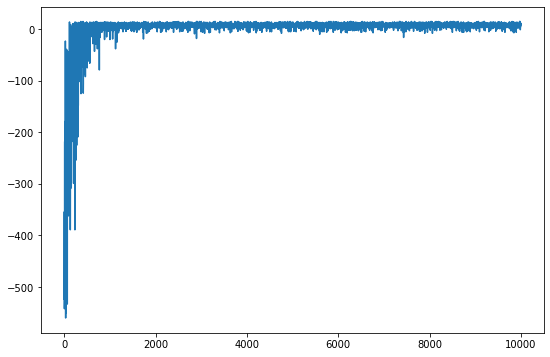

In [ ]:
q_values1,rewards1,ufd1 = SMDP(gamma,alpha,epsilon)
plt.figure(figsize=(9,6))
plt.plot(rewards1)

In [ ]:
np.mean(rewards1[8000:])

7.4725

In [ ]:
#### Intra-Option Q-Learning 

# Add parameters you might need here
gamma = 0.93
alpha = 0.2
epsilon=0.001
# Iterate over 1000 episodes
def intra(gamma,alpha,epsilon):
  Rewards = []
  q_values_SMDP2 = get_q()
  ufd2 = np.zeros((500,9))#Update_Frequency Data structure
  for _ in range(10000):
      state = env.reset()    
      done = False

      # While episode is not over
      episode_reward = 0
      while not done:

          # Choose action        
          action = egreedy_policy(q_values_SMDP2, state, epsilon)
          
          # Checking if primitive action
          if action < 6:
              # Perform regular Q-Learning update for state-action pair

              next_state, reward, done,_ = env.step(action)
              q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
              ufd2[state,action] += 1
              episode_reward+=reward

              state = next_state
          
          # Checking if action chosen is an option

          if action == 6: # action => goto highway option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = goto_hw(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = goto_hw(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state

              

                
            
          if action == 7: # action => move left of highway option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = left_hw(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = left_hw(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state


          if action == 8: # action => move right of highway option

              optdone = False
              while (optdone == False) :
                  
                  optact,_ = right_hw(env,state) 
                  next_state, reward, done,_ = env.step(optact)
                  _,optdone = right_hw(env,next_state) 
                  episode_reward+=reward

                  q_values_SMDP2[state, optact] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, optact])
                  ufd2[state,optact] += 1
                  
                  if not optdone:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*q_values_SMDP2[next_state, action] - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1
                  else:
                    q_values_SMDP2[state, action] += alpha*(reward + gamma*np.max([q_values_SMDP2[next_state, action] for action in actions]) - q_values_SMDP2[state, action])
                    ufd2[state,action] += 1

                  state = next_state


      Rewards.append(episode_reward)

  return q_values_SMDP2,Rewards,ufd2




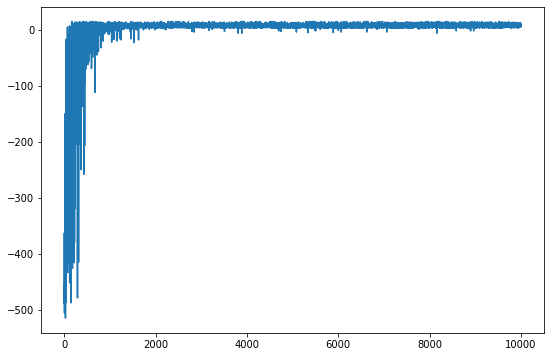

In [ ]:
q_values2,rewards2,ufd2 = intra(gamma,alpha,epsilon)
plt.figure(figsize=(9,6))
plt.plot(rewards2)

In [ ]:
np.mean(rewards2[8000:])

7.949

In [ ]:
#case when passenger is at either R,G,Y,B
#To visualise lets break the task into 2 parts: pick-up and drop
op_SMDP_1 = [np.zeros((5,5)) for i in range(4)]  #Matrix to hold the optimal actions/options in each state
op_SMDP_q1 = [np.zeros((5,5)) for i in range(4)]
ufd_SMDP_1 = [np.zeros((5,5)) for i in range(4)]
op_intra_1 = [np.zeros((5,5)) for i in range(4)] #cases where passengers are not in the taxi 
op_intra_q1 = [np.zeros((5,5)) for i in range(4)]
ufd_intra_1 = [np.zeros((5,5)) for i in range(4)]

op_SMDP_2 = [np.zeros((5,5)) for i in range(4)]  #Matrix to hold the optimal actions/options in each state
op_SMDP_q2 = [np.zeros((5,5)) for i in range(4)]
ufd_SMDP_2 = [np.zeros((5,5)) for i in range(4)]
op_intra_2 = [np.zeros((5,5)) for i in range(4)] #cases where passenger is in the taxi
op_intra_q2 = [np.zeros((5,5)) for i in range(4)]
ufd_intra_2 = [np.zeros((5,5)) for i in range(4)]

for i in range(500): #iterating over all states
  state = list(env.decode(i))
  if state[2] != 4:
    op_SMDP_1[state[2]][state[0],state[1]] = np.argmax(q_values1[i])
    op_SMDP_q1[state[2]][state[0],state[1]] = np.amax(q_values1[i])
    ufd_SMDP_1[state[2]][state[0],state[1]] = np.sum(ufd1[i])
    op_intra_1[state[2]][state[0],state[1]] = np.argmax(q_values2[i])
    op_intra_q1[state[2]][state[0],state[1]] = np.amax(q_values2[i])
    ufd_intra_1[state[2]][state[0],state[1]] = np.sum(ufd2[i])
  else:
    op_SMDP_2[state[3]][state[0],state[1]] = np.argmax(q_values1[i])
    op_SMDP_q2[state[3]][state[0],state[1]] = np.amax(q_values1[i])
    ufd_SMDP_2[state[3]][state[0],state[1]] = np.sum(ufd1[i])
    op_intra_2[state[3]][state[0],state[1]] = np.argmax(q_values2[i])
    op_intra_q2[state[3]][state[0],state[1]] = np.amax(q_values2[i])
    ufd_intra_2[state[3]][state[0],state[1]] = np.sum(ufd2[i])


In [ ]:
def visualise_q(m1,m2):
  fig, ax = plt.subplots(figsize = (10,10))
  im = ax.imshow(m1, extent=[0, 10, 0, 10])
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  fig.colorbar(im, cax=cax, orientation='vertical')
  def x_direct(a):
    if a in [0,1,4,5,6,7,8]:
        return 0
    elif a in [2]:
        return 1
    else:
        return -1
  def y_direct(a):
    if a in [2,3,4,5,6,7,8]:
      return 0
    elif a in [1]:
        return 1
    else:
        return -1
  policyx = np.vectorize(x_direct)(m2)
  policyy = np.vectorize(y_direct)(m2)
  idx = 2*np.indices((5,5))
  ax.quiver(idx[1][::-1].ravel()+ 1, idx[0][::-1].ravel()+1, policyx.ravel(), policyy.ravel(), pivot="middle", color='red')

  for i in range(5):
    for j in range(5):
      if m2[i][j] == 4:  #pick-rectangle
        #rect = patches.Rectangle((idx[1][::-1][i][j]+0.5, idx[0][::-1][i][j]+0.5), 1, 1, linewidth=0.5, edgecolor='r', facecolor='r')
        #ax.add_patch(rect)
        ax.text(idx[1][::-1][i][j]+0.6, idx[0][::-1][i][j]+0.6 ,'Pick',color = 'r', fontsize= 20)
      if m2[i][j] == 5:  #drop-Circle
        #circ = patches.Circle((idx[1][::-1][i][j]+1, idx[0][::-1][i][j]+1), 0.5, linewidth=0.5, edgecolor='r', facecolor='r')
        #ax.add_patch(circ)
        ax.text(idx[1][::-1][i][j]+0.6, idx[0][::-1][i][j]+0.6 ,'Drop',color = 'r', fontsize= 20)
      if m2[i][j] == 6:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'H',color = 'r', fontsize= 35)

      if m2[i][j] == 7:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'L',color = 'r', fontsize= 35)

      if m2[i][j] == 8:
        ax.text(idx[1][::-1][i][j]+0.9, idx[0][::-1][i][j]+0.9 ,'R',color = 'r', fontsize= 35)
  
  fig.tight_layout()
  

In [ ]:
def freq_heat(m1):
  fig, ax = plt.subplots(figsize = (10,10))
  im = ax.imshow(m1, extent=[0, 10, 0, 10])
  ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
  divider = make_axes_locatable(ax)
  cax = divider.append_axes('right', size='5%', pad=0.05)
  fig.colorbar(im, cax=cax, orientation='vertical')